In [3]:
import numpy as np

In [4]:
def selection_sort(x):
    for i in range(len(x)): 
        swap = i + np.argmin(x[i:]) 
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [5]:
x = np.array([2, 1, 3, 5, 4])
# selection_sort(x)

In [6]:
np.sort(x) 


array([1, 2, 3, 4, 5])

In [7]:
i = np.argsort(x) # Shows the indices of the sorted elements
x[i]

array([1, 2, 3, 4, 5])

In [24]:
rand =  np.random.RandomState(42)
x = rand.randint(0, 10, (4, 6))
print(x)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [9]:
 #Using np.sort() axis parameter

print(np.sort(x, axis=0)) # Sorting the columns. 
print(np.sort(x, axis=1)) # Sorting the rows. 

[[2 1 4 0 1 5]
 [5 2 5 4 3 7]
 [6 3 7 4 6 7]
 [7 6 7 4 9 9]]
[[3 4 6 6 7 9]
 [2 3 4 6 7 7]
 [1 2 4 5 7 7]
 [0 1 4 5 5 9]]


In [10]:
# Partioning
X = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(X, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [11]:
np.partition(x, 3, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [2, 1, 4, 5, 7, 7],
       [0, 4, 1, 5, 9, 5]])

In [12]:
np.partition??

Signature:       np.partition(a, kth, axis=-1, kind='introselect', order=None)
Call signature:  np.partition(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function partition at 0x0000025B2D8802C0>
File:            c:\users\astrojoe\anaconda3\lib\site-packages\numpy\core\fromnumeric.py
Source:         
@array_function_dispatch(_partition_dispatcher)
def partition(a, kth, axis=-1, kind='introselect', order=None):
    """
    Return a partitioned copy of an array.

    Creates a copy of the array with its elements rearranged in such a
    way that the value of the element in k-th position is in the position
    the value would be in a sorted array.  In the partitioned array, all
    elements before the k-th element are less than or equal to that
    element, and all the elements after the k-th element are greater than
    or equal to that element.  The ordering of the elements in the two
    partitions is undefined.

    .. versionadded:: 1.8.0

    Paramete

In [60]:
# k-Nearest Neighbours

X = rand.rand(100, 2)

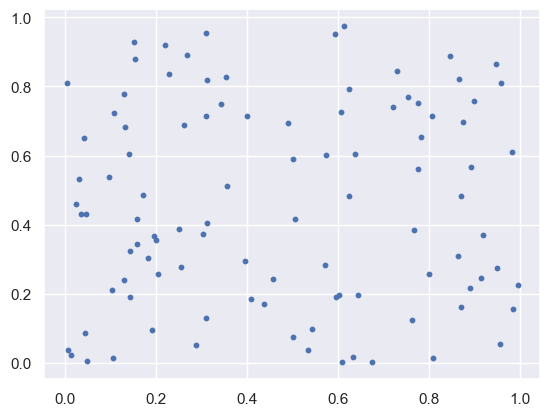

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn; seaborn.set() # Plot styling 
plt.scatter(X[:, 0], X[:, 1], s=10);
plt.show()

In [64]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)
dist_sq 


array([[0.        , 1.02775652, 0.06314734, ..., 0.50044188, 0.07755795,
        0.01293118],
       [1.02775652, 0.        , 1.04003311, ..., 0.63045518, 0.97403888,
        1.21262542],
       [0.06314734, 1.04003311, 0.        , ..., 0.81727208, 0.0020063 ,
        0.11822093],
       ...,
       [0.50044188, 0.63045518, 0.81727208, ..., 0.        , 0.81954615,
        0.50486569],
       [0.07755795, 0.97403888, 0.0020063 , ..., 0.81954615, 0.        ,
        0.14251285],
       [0.01293118, 1.21262542, 0.11822093, ..., 0.50486569, 0.14251285,
        0.        ]])

In [65]:
# dist_sq.shape
# dis_sq.diagonal()

nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[ 0 89 70 ...  1 35 32]
 [ 1 35 29 ... 18 99 15]
 [ 2 98 58 ... 29 32 35]
 ...
 [97 45 48 ... 84 86 57]
 [98 58  2 ... 29 32 35]
 [99 50 15 ...  1 35 32]]


In [81]:
K = 8
nearest_partition = np.argpartition(dis_sq, K+1, axis=1)
nearest_partition

array([[0, 1, 2, 3, 4, 5, 6, 7, 9, 8],
       [0, 1, 9, 3, 4, 5, 6, 7, 8, 2],
       [0, 1, 2, 3, 4, 9, 6, 7, 8, 5],
       [0, 1, 9, 3, 4, 5, 6, 7, 8, 2],
       [0, 1, 9, 3, 4, 5, 6, 7, 8, 2],
       [9, 1, 2, 3, 4, 5, 6, 7, 8, 0],
       [9, 1, 2, 3, 4, 5, 6, 7, 8, 0],
       [0, 1, 9, 3, 4, 5, 6, 7, 8, 2],
       [9, 1, 2, 3, 4, 5, 6, 7, 8, 0],
       [0, 1, 9, 3, 4, 5, 6, 7, 8, 2]], dtype=int64)

In [86]:
plt.scatter(X[:,0], X[:, 1], s=10)

# Draw lines from each point to its nearest neighbours
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # "use some zip magic to make it happen"
        plt.plot(*zip(X[j], X[i]), color='black')
plt.show()

IndexError: index 10 is out of bounds for axis 0 with size 10

In [76]:
nearest_partition.shape[0]

10

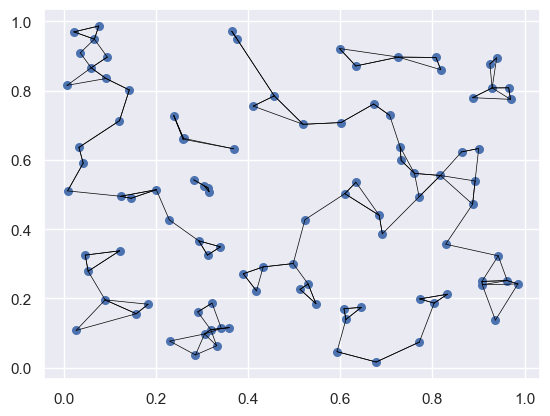

In [95]:
rand = np.random.RandomState(42)
X = rand.rand(100, 2)

# Compute squared distances
dis_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :])**2, axis=-1)

# K nearest neighbors
K = 2

# Get indices of smallest distances (include self)
nearest_partition = np.argpartition(dis_sq, K+1, axis=1)

# Clip indices to valid range (0 to 99)
nearest_partition = np.clip(nearest_partition, 0, X.shape[0]-1)

# Plot points
plt.scatter(X[:, 0], X[:, 1], s=30)

# Draw lines to K nearest neighbors
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[i], X[j]), color='black', linewidth=0.5)

plt.show()